#### Regression to predict house prices

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
sns.set()

In [2]:
# import train and test datasets
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')

In [3]:
# verify import by showing first 5 rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Exploratory Data Analysis

In [4]:
# printing out info() for both train and test dataframes
print(train.info())
print('*'*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# target variabloe is SalePrice
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

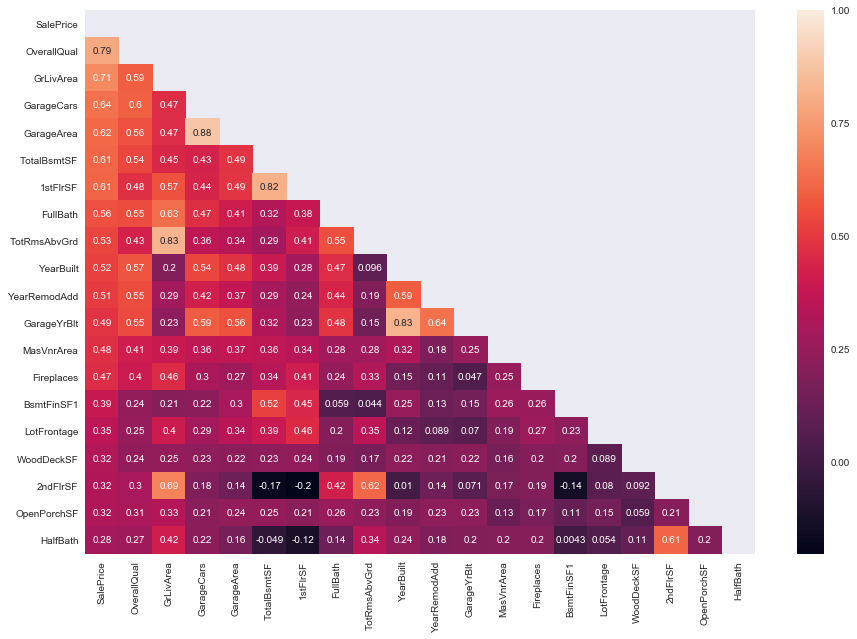

In [6]:
# finding SalePrice top 20 correlated variables
corr = train.corr()
ix = corr.abs().sort_values(by='SalePrice', ascending=False).index
df_sort = train.loc[:, ix]
top20 = df_sort.iloc[:, :20]
df_corr = top20.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, mask=mask, annot=True)

#### Plotting SalePrice with top 20 correlated values 

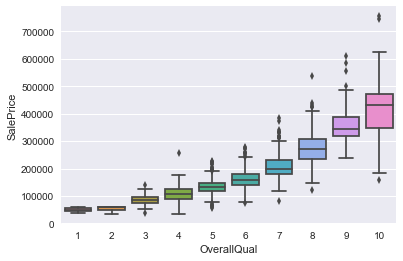

In [7]:
# plotting SalePrice and OverallQual relationship
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

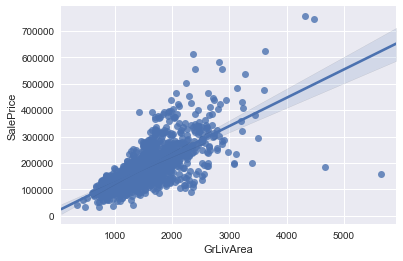

In [8]:
# plotting SalePrice and GrLivArea relationship
sns.regplot(x='GrLivArea', y='SalePrice', data=train)

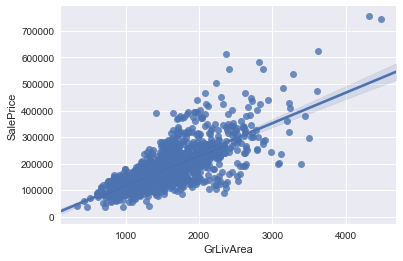

In [9]:
# drop two outliers with low price and high square foot
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 250000)].index)
sns.regplot(x='GrLivArea', y='SalePrice', data=train)

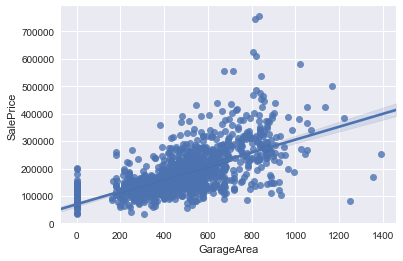

In [10]:
# plotting SalePrice and GarageArea relationship
sns.regplot(x='GarageArea', y='SalePrice', data=train)

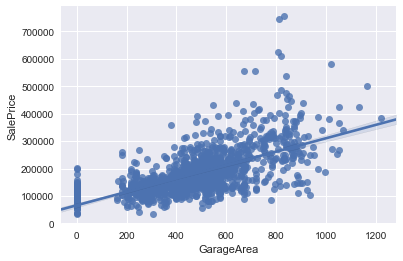

In [11]:
# drop three outliers with low price and high sqaure foot
train = train.drop(train[(train['GarageArea'] > 1200) & (train['SalePrice'] < 300000)].index)
sns.regplot(x='GarageArea', y='SalePrice', data=train)

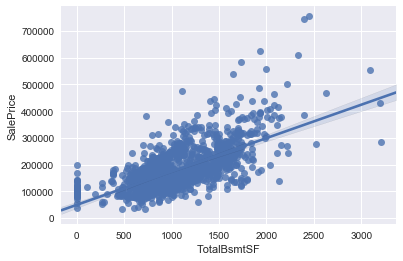

In [12]:
# plotting SalePrice and Total basement square foot relationship
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train)

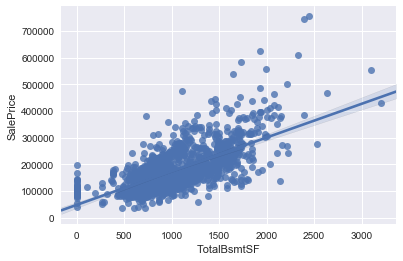

In [13]:
# drop one outlier with low price and high square foot 
train = train.drop(train[(train['TotalBsmtSF'] > 3000) & (train['SalePrice'] < 350000)].index)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train)

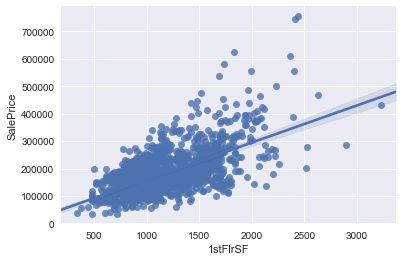

In [14]:
# plotting SalePrice and 1st floor square foot relationship
sns.regplot(x='1stFlrSF', y='SalePrice', data=train)

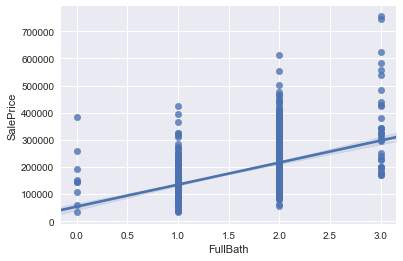

In [15]:
# plotting SalePrice and FullBath relationship
sns.regplot(x='FullBath', y='SalePrice', data=train)

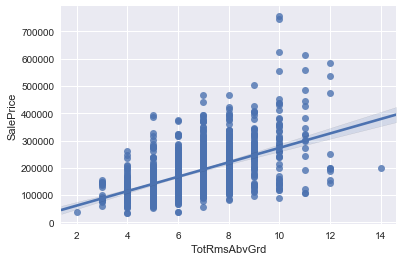

In [16]:
# plotting SalePrice and Total rooms above ground relationship
sns.regplot(x='TotRmsAbvGrd', y='SalePrice', data=train)

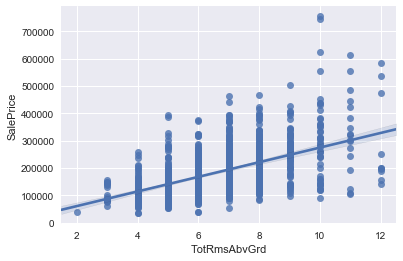

In [17]:
# drop one outlier with low price and extremely high amount of rooms
train = train.drop(train[(train['TotRmsAbvGrd'] > 13) & (train['SalePrice'] < 300000)].index)
sns.regplot(x='TotRmsAbvGrd', y='SalePrice', data=train)

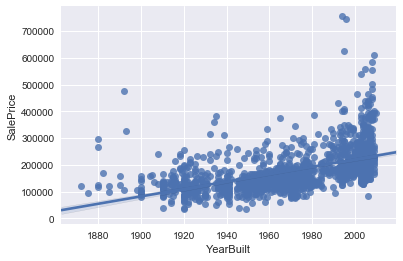

In [18]:
# plotting SalePrice and YearBuilt relationship
sns.regplot(x='YearBuilt', y='SalePrice', data=train)

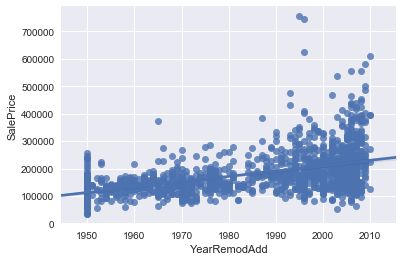

In [19]:
# plotting SalePrice and Year remodel or addition
sns.regplot(x='YearRemodAdd', y='SalePrice', data=train)

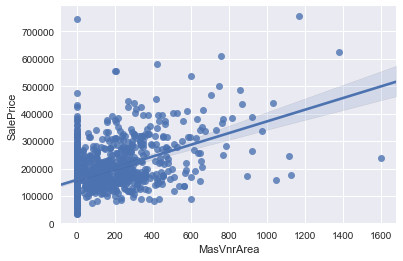

In [20]:
# plotting SalePrice and Mason veneer area relationship
sns.regplot(x='MasVnrArea', y='SalePrice', data=train)

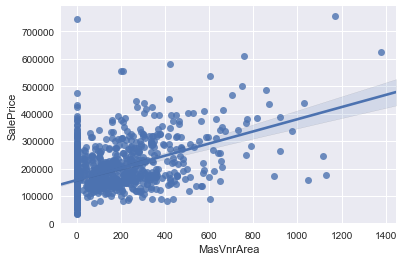

In [21]:
# drop one outlier with low price and high mason veneer square foot
train = train.drop(train[(train['MasVnrArea'] > 1500) & (train['SalePrice'] < 300000)].index)
sns.regplot(x='MasVnrArea', y='SalePrice', data=train)

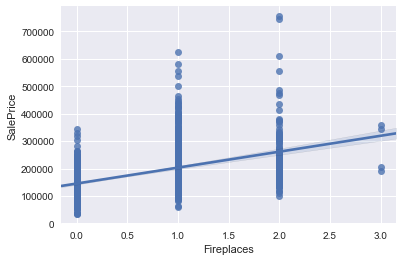

In [22]:
# plotting SalePrice and Fireplaces relationship
sns.regplot(x='Fireplaces', y='SalePrice', data=train)

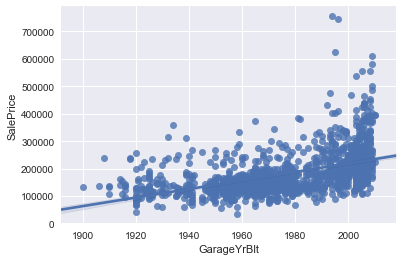

In [23]:
# plotting SalePrice and Garage year built relationship
sns.regplot(x='GarageYrBlt', y='SalePrice', data=train)

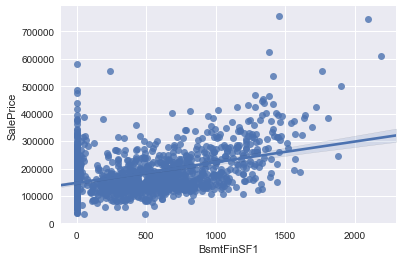

In [24]:
# plotting SalePrice and Basement finished square feet
sns.regplot(x='BsmtFinSF1', y='SalePrice', data=train)

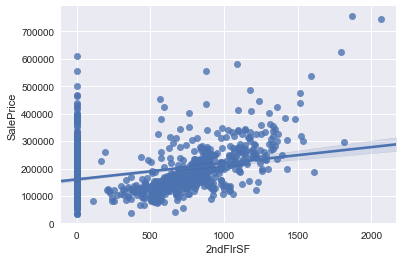

In [25]:
# plotting SalePrice and 2nd floor square foot relationship
sns.regplot(x='2ndFlrSF', y='SalePrice', data=train)

#### Data wrangling

In [26]:
# Combine train and test data for cleaning
df_train = train.shape[0]
df_test = test.shape[0]
all_data = pd.concat([train, test])
all_data.drop(['SalePrice', 'Id'], axis=1, inplace=True)

In [27]:
# missing data 
ad_nan = all_data.isnull().sum()
ad_nan = ad_nan.drop(ad_nan[ad_nan == 0].index).sort_values(ascending=False)
ad_nan                                                       

PoolQC          2902
MiscFeature     2807
Alley           2715
Fence           2340
FireplaceQu     1418
LotFrontage      485
GarageQual       158
GarageCond       158
GarageFinish     158
GarageYrBlt      158
GarageType       156
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType1      79
BsmtFinType2      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

In [28]:
# based on Data description text, majority nan values means not present and are replaced by 'none'
all_data['PoolQc'] = all_data['PoolQC'].fillna('none')

all_data['MiscFeature'] = all_data['MiscFeature'].fillna('none')

all_data['Alley'] = all_data['Alley'].fillna('none')

all_data['Fence'] = all_data['Fence'].fillna('none')

all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('none')

# lot frontage nan values are replace by the mean of lot frontage
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())

all_data['GarageQual'] = all_data['GarageQual'].fillna('none')

all_data['GarageCond'] = all_data['GarageCond'].fillna('none')

all_data['GarageFinish']  = all_data['GarageFinish'].fillna('none')

all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna('none')

all_data['GarageType'] = all_data['GarageType'].fillna('none')

all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('none')

all_data['BsmtCond'] = all_data['BsmtCond'].fillna('none')

all_data['BsmtQual'] = all_data['BsmtQual'].fillna('none')

all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('none')

all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('none')

all_data['MasVnrType'] = all_data['MasVnrType'].fillna('none')

# mason veneer area nan values are replaced by '0'
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

# mszoning nan values are replaced by the most common observation
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

# basement bathroom nan value are replaced by '0'
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

# utilities nan values are replaced by 'AllPub'
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')

# functional nan values are replaced by most common observation 'Typ'
all_data['Functional'] = all_data['Functional'].fillna('Typ')

# electrical nan values are replaced by most common observation 'SBrkr'
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

# exterior nan values are replaced by most common observation 'VinylSd'
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')

all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna('None')

all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].mean())

# garage cars nan values are replaced by most common observation '2.0'
all_data['GarageCars'] = all_data['GarageCars'].fillna(2.0)

all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0.0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0.0)

# kitchen quality nan values are replaced by most common observation 'TA'
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')

# saletype nan values are replaced by most common observation 'WD'
all_data['SaleType'] = all_data['SaleType'].fillna('WD')
                                                           

In [29]:
# separate combined dataset to numerical and catergorical sets
all_data_num = all_data.dtypes[all_data.dtypes != 'object'].index
all_data_cat = all_data.dtypes[all_data.dtypes == 'object'].index

#### EDA on target variable

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


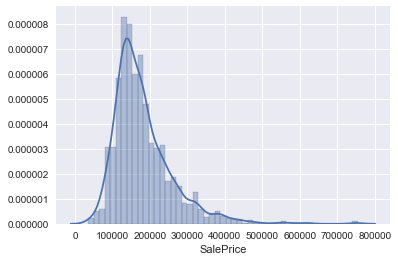

In [30]:
# plotting SalePrice distribution 
sns.distplot(train['SalePrice'])

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


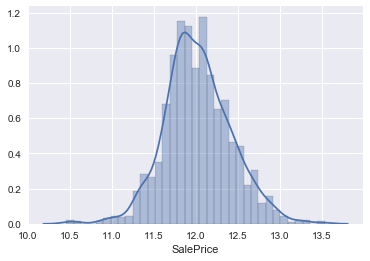

In [31]:
# SalePrice is not normally distributed and skewed, taking the log+1 to fix skewness
sns.distplot(np.log1p(train['SalePrice']))

In [32]:
# fixing the skewness of feature variables
from scipy.stats import skew
skewed = all_data[all_data_num].apply(lambda x: skew(x))
skewed = skewed[skewed > 0.75]
skewed = skewed.index

all_data[skewed] = np.log1p(all_data[skewed])

In [33]:
# convert catergorical to numerical data
dummy_cat = pd.get_dummies(all_data[all_data_cat], drop_first=True)
all_data = pd.concat([all_data, dummy_cat], axis=1)
all_data.drop(all_data_cat, axis=1, inplace=True)

In [34]:
all_data = pd.get_dummies(all_data, drop_first=True)

#### Modelling using root mean squared error to choose best model for house price prediction

In [35]:
X_train = all_data[:df_train]
X_test = all_data[df_test:]
y_train = np.log1p(train['SalePrice'])

X_train.shape, X_test.shape, y_train.shape

((1452, 1416), (1452, 1416), (1452,))

In [36]:
# import model libraries
from sklearn.linear_model import Ridge, ElasticNet, Lasso 
from sklearn.model_selection import cross_val_score

# function to use cross_val_score to evaluate model
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [39]:
# Ridge regression model 
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

Text(0,0.5,'rmse')

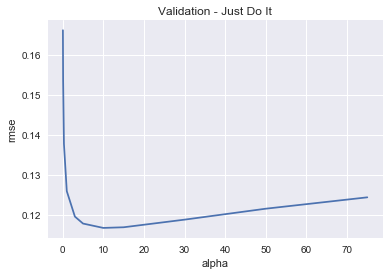

In [40]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [41]:
cv_ridge.min()

0.11664815450450801

In [55]:
# Lasso regression model
model_lasso = Lasso(alpha = 0.0005).fit(X_train, y_train)
rmse_cv(model_lasso).mean()

0.11461316618998266

In [56]:
# Elastic 
model_elastic = ElasticNet(alpha = 0.0005).fit(X_train, y_train)
rmse_cv(model_elastic).mean()

0.11539403548376596